In [1]:
# From
# https://clay-atlas.com/us/blog/2021/06/14/pytorch-en-build-gan-gnerate-mnist/
# https://github.com/ccs96307/PyTorch-GAN-Mnist

In [2]:
# -*- coding: utf-8 -*-
import time

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

from torchvision import datasets
from torchvision.transforms import transforms

# from model import discriminator, generator

import numpy as np
import matplotlib.pyplot as plt


In [3]:
class discriminator(nn.Module):
    def __init__(self):
        super(discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(784, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)


class generator(nn.Module):
    def __init__(self):
        super(generator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(128, 1024),
            nn.ReLU(),
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)
    

In [4]:
start_time = time.time()
plt.rcParams['image.cmap'] = 'gray'

def show_images(images):
    sqrtn = int(np.ceil(np.sqrt(images.shape[0])))

    for index, image in enumerate(images):
        plt.subplot(sqrtn, sqrtn, index+1)
        plt.imshow(image.reshape(28, 28))
        

In [5]:
# Discriminator Loss => BCELoss
def d_loss_function(inputs, targets):
    return nn.BCELoss()(inputs, targets)


def g_loss_function(inputs):
    targets = torch.ones([inputs.shape[0], 1])
    targets = targets.to(device)
    return nn.BCELoss()(inputs, targets)


In [6]:
# GPU
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print('GPU State:', device)

# Model
G = generator().to(device)
D = discriminator().to(device)
print(G)
print(D)

# Settings
epochs = 200
lr = 0.0002
batch_size = 64
g_optimizer = optim.Adam(G.parameters(), lr=lr, betas=(0.5, 0.999))
d_optimizer = optim.Adam(D.parameters(), lr=lr, betas=(0.5, 0.999))


# Transform
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])


# Load data
train_set = datasets.MNIST('../dataset/', train=True, download=True, transform=transform)
test_set = datasets.MNIST('../dataset/', train=False, download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)


GPU State: cuda:0
generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=1024, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1024, out_features=784, bias=True)
    (5): Tanh()
  )
)
discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
)


[1/200, 100/938] D_loss: 0.657 G_loss: 0.831
[1/200, 200/938] D_loss: 0.689 G_loss: 0.784
[1/200, 300/938] D_loss: 0.676 G_loss: 0.860
[1/200, 400/938] D_loss: 0.571 G_loss: 0.999
[1/200, 500/938] D_loss: 0.684 G_loss: 0.968
[1/200, 600/938] D_loss: 0.403 G_loss: 1.698
[1/200, 700/938] D_loss: 0.493 G_loss: 1.371
[1/200, 800/938] D_loss: 0.253 G_loss: 2.187
[1/200, 900/938] D_loss: 0.428 G_loss: 2.211
[1/200, 938/938] D_loss: 0.333 G_loss: 2.792


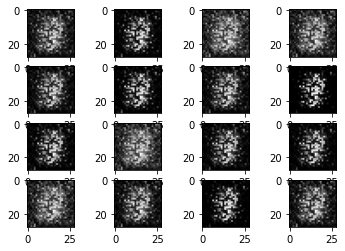

[2/200, 100/938] D_loss: 0.255 G_loss: 2.722
[2/200, 200/938] D_loss: 0.324 G_loss: 2.347
[2/200, 300/938] D_loss: 0.438 G_loss: 1.233
[2/200, 400/938] D_loss: 0.243 G_loss: 2.944
[2/200, 500/938] D_loss: 0.242 G_loss: 1.995
[2/200, 600/938] D_loss: 0.237 G_loss: 2.383
[2/200, 700/938] D_loss: 0.275 G_loss: 3.206
[2/200, 800/938] D_loss: 0.223 G_loss: 2.398
[2/200, 900/938] D_loss: 0.302 G_loss: 2.741
[2/200, 938/938] D_loss: 0.399 G_loss: 1.321


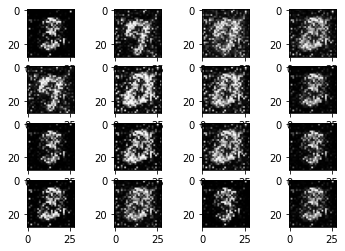

[3/200, 100/938] D_loss: 0.387 G_loss: 1.625
[3/200, 200/938] D_loss: 0.373 G_loss: 1.431
[3/200, 300/938] D_loss: 0.187 G_loss: 3.048
[3/200, 400/938] D_loss: 0.221 G_loss: 1.869
[3/200, 500/938] D_loss: 0.286 G_loss: 3.220
[3/200, 600/938] D_loss: 0.438 G_loss: 1.329
[3/200, 700/938] D_loss: 0.410 G_loss: 2.783
[3/200, 800/938] D_loss: 0.189 G_loss: 2.425
[3/200, 900/938] D_loss: 0.324 G_loss: 3.898
[3/200, 938/938] D_loss: 0.253 G_loss: 2.528


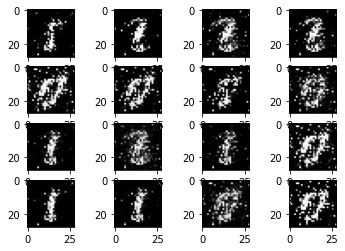

[4/200, 100/938] D_loss: 0.312 G_loss: 3.047
[4/200, 200/938] D_loss: 0.424 G_loss: 2.277
[4/200, 300/938] D_loss: 0.421 G_loss: 1.342
[4/200, 400/938] D_loss: 0.288 G_loss: 2.914
[4/200, 500/938] D_loss: 0.463 G_loss: 2.401
[4/200, 600/938] D_loss: 0.310 G_loss: 2.357
[4/200, 700/938] D_loss: 0.472 G_loss: 2.216
[4/200, 800/938] D_loss: 0.461 G_loss: 3.209
[4/200, 900/938] D_loss: 0.359 G_loss: 1.534
[4/200, 938/938] D_loss: 0.435 G_loss: 2.930


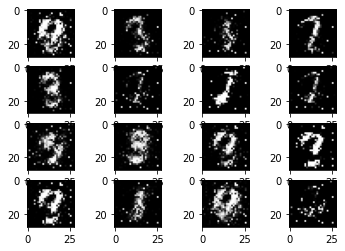

[5/200, 100/938] D_loss: 0.342 G_loss: 1.451
[5/200, 200/938] D_loss: 0.499 G_loss: 3.602
[5/200, 300/938] D_loss: 0.438 G_loss: 2.450
[5/200, 400/938] D_loss: 0.435 G_loss: 3.303
[5/200, 500/938] D_loss: 0.370 G_loss: 3.106
[5/200, 600/938] D_loss: 0.328 G_loss: 1.454
[5/200, 700/938] D_loss: 0.394 G_loss: 3.430
[5/200, 800/938] D_loss: 0.357 G_loss: 1.787
[5/200, 900/938] D_loss: 0.398 G_loss: 1.633
[5/200, 938/938] D_loss: 0.496 G_loss: 3.578


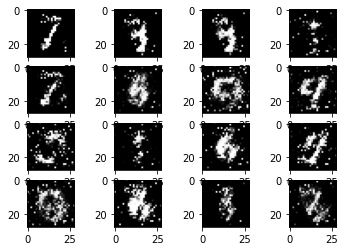

[6/200, 100/938] D_loss: 0.395 G_loss: 1.769
[6/200, 200/938] D_loss: 0.523 G_loss: 2.044
[6/200, 300/938] D_loss: 0.530 G_loss: 0.624
[6/200, 400/938] D_loss: 0.949 G_loss: 0.835
[6/200, 500/938] D_loss: 0.408 G_loss: 2.442
[6/200, 600/938] D_loss: 0.383 G_loss: 2.880
[6/200, 700/938] D_loss: 0.426 G_loss: 1.182
[6/200, 800/938] D_loss: 0.579 G_loss: 0.889
[6/200, 900/938] D_loss: 0.544 G_loss: 1.136
[6/200, 938/938] D_loss: 0.395 G_loss: 1.925


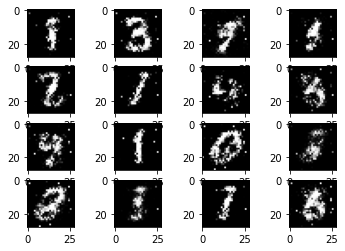

[7/200, 100/938] D_loss: 0.484 G_loss: 1.098
[7/200, 200/938] D_loss: 0.456 G_loss: 3.223
[7/200, 300/938] D_loss: 0.545 G_loss: 1.049
[7/200, 400/938] D_loss: 0.452 G_loss: 2.096
[7/200, 500/938] D_loss: 0.447 G_loss: 1.845
[7/200, 600/938] D_loss: 0.444 G_loss: 1.525
[7/200, 700/938] D_loss: 0.509 G_loss: 1.446
[7/200, 800/938] D_loss: 0.467 G_loss: 1.197
[7/200, 900/938] D_loss: 0.378 G_loss: 1.256
[7/200, 938/938] D_loss: 0.473 G_loss: 1.156


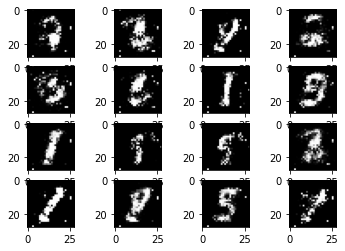

[8/200, 100/938] D_loss: 0.380 G_loss: 1.749
[8/200, 200/938] D_loss: 0.441 G_loss: 1.673
[8/200, 300/938] D_loss: 0.308 G_loss: 1.911
[8/200, 400/938] D_loss: 0.469 G_loss: 1.925
[8/200, 500/938] D_loss: 0.440 G_loss: 2.368
[8/200, 600/938] D_loss: 0.517 G_loss: 1.074
[8/200, 700/938] D_loss: 0.470 G_loss: 1.207
[8/200, 800/938] D_loss: 0.483 G_loss: 1.402
[8/200, 900/938] D_loss: 0.433 G_loss: 2.141
[8/200, 938/938] D_loss: 0.407 G_loss: 2.106


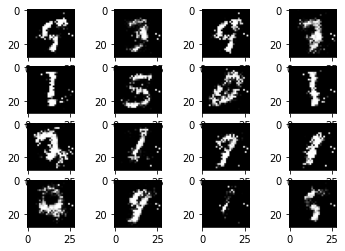

[9/200, 100/938] D_loss: 0.340 G_loss: 1.489
[9/200, 200/938] D_loss: 0.428 G_loss: 1.300
[9/200, 300/938] D_loss: 0.541 G_loss: 1.299
[9/200, 400/938] D_loss: 0.368 G_loss: 1.236
[9/200, 500/938] D_loss: 0.375 G_loss: 1.620
[9/200, 600/938] D_loss: 0.428 G_loss: 1.505
[9/200, 700/938] D_loss: 0.487 G_loss: 1.857
[9/200, 800/938] D_loss: 0.627 G_loss: 0.841
[9/200, 900/938] D_loss: 0.447 G_loss: 1.134
[9/200, 938/938] D_loss: 0.568 G_loss: 2.350


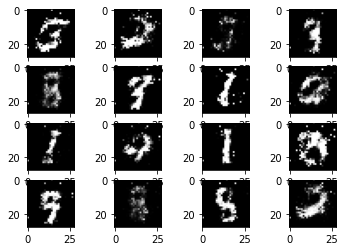

[10/200, 100/938] D_loss: 0.427 G_loss: 1.767
[10/200, 200/938] D_loss: 0.502 G_loss: 1.416
[10/200, 300/938] D_loss: 0.370 G_loss: 1.292
[10/200, 400/938] D_loss: 0.489 G_loss: 1.350
[10/200, 500/938] D_loss: 0.651 G_loss: 1.405
[10/200, 600/938] D_loss: 0.324 G_loss: 3.828
[10/200, 700/938] D_loss: 0.623 G_loss: 2.152
[10/200, 800/938] D_loss: 0.424 G_loss: 2.277
[10/200, 900/938] D_loss: 0.390 G_loss: 1.352
[10/200, 938/938] D_loss: 0.445 G_loss: 1.175


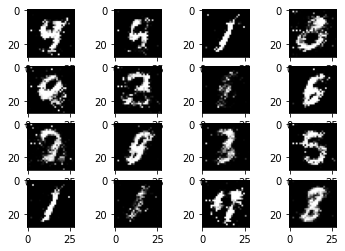

[11/200, 100/938] D_loss: 0.427 G_loss: 0.870
[11/200, 200/938] D_loss: 0.477 G_loss: 1.113
[11/200, 300/938] D_loss: 0.639 G_loss: 2.136
[11/200, 400/938] D_loss: 0.542 G_loss: 1.217
[11/200, 500/938] D_loss: 0.563 G_loss: 0.826
[11/200, 600/938] D_loss: 0.491 G_loss: 1.126
[11/200, 700/938] D_loss: 0.546 G_loss: 1.106
[11/200, 800/938] D_loss: 0.468 G_loss: 1.214
[11/200, 900/938] D_loss: 0.547 G_loss: 0.929
[11/200, 938/938] D_loss: 0.534 G_loss: 1.390


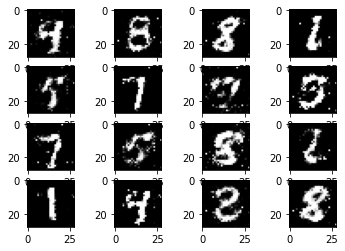

[12/200, 100/938] D_loss: 0.587 G_loss: 1.273
[12/200, 200/938] D_loss: 0.566 G_loss: 0.893
[12/200, 300/938] D_loss: 0.473 G_loss: 1.114
[12/200, 400/938] D_loss: 0.494 G_loss: 1.133
[12/200, 500/938] D_loss: 0.649 G_loss: 2.075
[12/200, 600/938] D_loss: 0.540 G_loss: 1.220
[12/200, 700/938] D_loss: 0.481 G_loss: 1.365
[12/200, 800/938] D_loss: 0.500 G_loss: 0.872
[12/200, 900/938] D_loss: 0.574 G_loss: 1.161
[12/200, 938/938] D_loss: 0.577 G_loss: 0.670


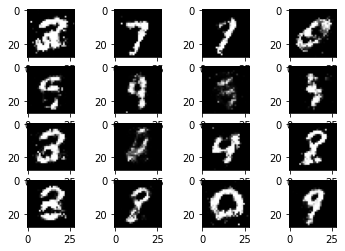

[13/200, 100/938] D_loss: 0.635 G_loss: 0.577
[13/200, 200/938] D_loss: 0.590 G_loss: 1.308
[13/200, 300/938] D_loss: 0.622 G_loss: 1.227
[13/200, 400/938] D_loss: 0.565 G_loss: 1.349
[13/200, 500/938] D_loss: 0.509 G_loss: 1.020
[13/200, 600/938] D_loss: 0.611 G_loss: 0.580
[13/200, 700/938] D_loss: 0.637 G_loss: 0.678
[13/200, 800/938] D_loss: 0.534 G_loss: 1.282
[13/200, 900/938] D_loss: 0.540 G_loss: 1.069
[13/200, 938/938] D_loss: 0.596 G_loss: 0.793


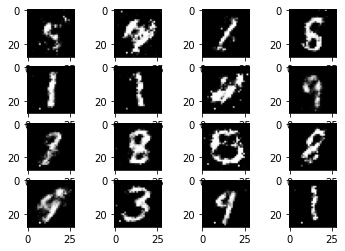

[14/200, 100/938] D_loss: 0.548 G_loss: 0.783
[14/200, 200/938] D_loss: 0.559 G_loss: 1.482
[14/200, 300/938] D_loss: 0.592 G_loss: 0.771
[14/200, 400/938] D_loss: 0.511 G_loss: 0.903
[14/200, 500/938] D_loss: 0.654 G_loss: 1.042
[14/200, 600/938] D_loss: 0.621 G_loss: 1.142
[14/200, 700/938] D_loss: 0.598 G_loss: 0.927
[14/200, 800/938] D_loss: 0.604 G_loss: 0.805
[14/200, 900/938] D_loss: 0.550 G_loss: 0.636
[14/200, 938/938] D_loss: 0.569 G_loss: 1.160


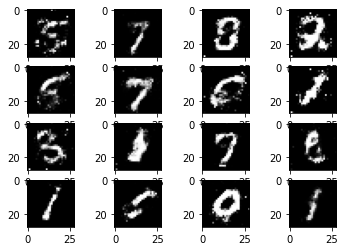

[15/200, 100/938] D_loss: 0.572 G_loss: 1.007
[15/200, 200/938] D_loss: 0.671 G_loss: 0.942
[15/200, 300/938] D_loss: 0.578 G_loss: 0.903
[15/200, 400/938] D_loss: 0.797 G_loss: 0.394
[15/200, 500/938] D_loss: 0.668 G_loss: 1.649
[15/200, 600/938] D_loss: 0.578 G_loss: 1.148
[15/200, 700/938] D_loss: 0.591 G_loss: 0.799
[15/200, 800/938] D_loss: 0.588 G_loss: 1.166
[15/200, 900/938] D_loss: 0.581 G_loss: 1.107
[15/200, 938/938] D_loss: 0.459 G_loss: 1.214


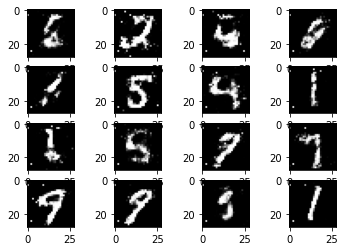

[16/200, 100/938] D_loss: 0.600 G_loss: 1.084
[16/200, 200/938] D_loss: 0.626 G_loss: 0.775
[16/200, 300/938] D_loss: 0.630 G_loss: 1.137
[16/200, 400/938] D_loss: 0.619 G_loss: 1.373
[16/200, 500/938] D_loss: 0.599 G_loss: 1.267
[16/200, 600/938] D_loss: 0.545 G_loss: 1.116
[16/200, 700/938] D_loss: 0.619 G_loss: 0.825
[16/200, 800/938] D_loss: 0.651 G_loss: 0.919
[16/200, 900/938] D_loss: 0.599 G_loss: 1.046
[16/200, 938/938] D_loss: 0.459 G_loss: 1.564


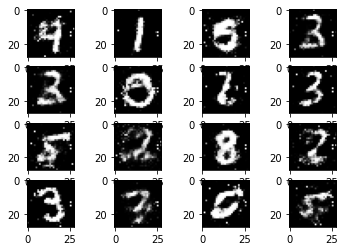

[17/200, 100/938] D_loss: 0.568 G_loss: 0.933
[17/200, 200/938] D_loss: 0.600 G_loss: 0.795
[17/200, 300/938] D_loss: 0.645 G_loss: 0.740
[17/200, 400/938] D_loss: 0.561 G_loss: 1.072
[17/200, 500/938] D_loss: 0.598 G_loss: 0.979
[17/200, 600/938] D_loss: 0.665 G_loss: 0.801
[17/200, 700/938] D_loss: 0.606 G_loss: 0.715
[17/200, 800/938] D_loss: 0.631 G_loss: 0.736
[17/200, 900/938] D_loss: 0.724 G_loss: 1.079
[17/200, 938/938] D_loss: 0.511 G_loss: 0.908


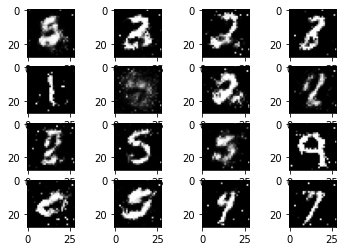

[18/200, 100/938] D_loss: 0.657 G_loss: 0.957
[18/200, 200/938] D_loss: 0.625 G_loss: 0.791
[18/200, 300/938] D_loss: 0.566 G_loss: 0.873
[18/200, 400/938] D_loss: 0.620 G_loss: 0.756
[18/200, 500/938] D_loss: 0.637 G_loss: 0.803
[18/200, 600/938] D_loss: 0.623 G_loss: 0.921
[18/200, 700/938] D_loss: 0.533 G_loss: 1.091
[18/200, 800/938] D_loss: 0.623 G_loss: 1.032
[18/200, 900/938] D_loss: 0.587 G_loss: 0.902
[18/200, 938/938] D_loss: 0.585 G_loss: 0.824


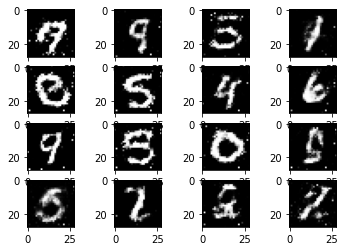

[19/200, 100/938] D_loss: 0.637 G_loss: 0.631
[19/200, 200/938] D_loss: 0.632 G_loss: 0.854
[19/200, 300/938] D_loss: 0.611 G_loss: 0.940
[19/200, 400/938] D_loss: 0.614 G_loss: 0.946
[19/200, 500/938] D_loss: 0.589 G_loss: 0.846
[19/200, 600/938] D_loss: 0.679 G_loss: 1.043
[19/200, 700/938] D_loss: 0.586 G_loss: 0.744
[19/200, 800/938] D_loss: 0.645 G_loss: 0.929
[19/200, 900/938] D_loss: 0.634 G_loss: 0.866
[19/200, 938/938] D_loss: 0.581 G_loss: 0.964


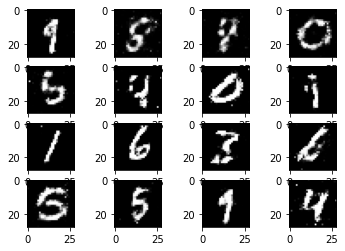

[20/200, 100/938] D_loss: 0.586 G_loss: 1.025
[20/200, 200/938] D_loss: 0.609 G_loss: 0.913
[20/200, 300/938] D_loss: 0.551 G_loss: 1.039
[20/200, 400/938] D_loss: 0.674 G_loss: 0.962
[20/200, 500/938] D_loss: 0.642 G_loss: 1.275
[20/200, 600/938] D_loss: 0.624 G_loss: 1.019
[20/200, 700/938] D_loss: 0.649 G_loss: 1.116
[20/200, 800/938] D_loss: 0.683 G_loss: 0.845
[20/200, 900/938] D_loss: 0.637 G_loss: 0.939
[20/200, 938/938] D_loss: 0.554 G_loss: 1.459


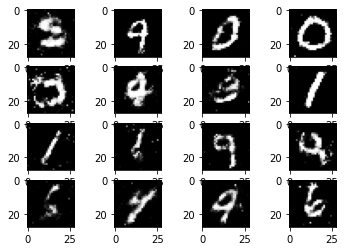

[21/200, 100/938] D_loss: 0.655 G_loss: 1.029
[21/200, 200/938] D_loss: 0.593 G_loss: 1.138
[21/200, 300/938] D_loss: 0.608 G_loss: 1.010
[21/200, 400/938] D_loss: 0.601 G_loss: 0.738
[21/200, 500/938] D_loss: 0.601 G_loss: 0.984
[21/200, 600/938] D_loss: 0.613 G_loss: 1.092
[21/200, 700/938] D_loss: 0.634 G_loss: 0.979
[21/200, 800/938] D_loss: 0.646 G_loss: 1.103
[21/200, 900/938] D_loss: 0.638 G_loss: 0.671
[21/200, 938/938] D_loss: 0.606 G_loss: 0.937


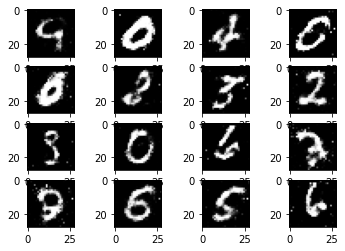

[22/200, 100/938] D_loss: 0.667 G_loss: 1.083
[22/200, 200/938] D_loss: 0.621 G_loss: 1.005
[22/200, 300/938] D_loss: 0.659 G_loss: 0.822
[22/200, 400/938] D_loss: 0.638 G_loss: 0.842
[22/200, 500/938] D_loss: 0.611 G_loss: 0.897
[22/200, 600/938] D_loss: 0.604 G_loss: 0.832
[22/200, 700/938] D_loss: 0.613 G_loss: 1.014
[22/200, 800/938] D_loss: 0.595 G_loss: 0.815
[22/200, 900/938] D_loss: 0.655 G_loss: 1.253
[22/200, 938/938] D_loss: 0.577 G_loss: 0.750


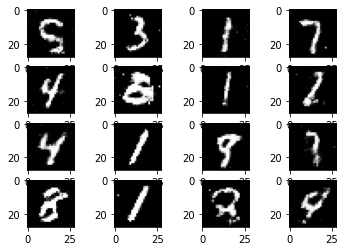

[23/200, 100/938] D_loss: 0.640 G_loss: 1.115
[23/200, 200/938] D_loss: 0.595 G_loss: 1.150
[23/200, 300/938] D_loss: 0.600 G_loss: 1.173
[23/200, 400/938] D_loss: 0.629 G_loss: 1.121
[23/200, 500/938] D_loss: 0.611 G_loss: 0.910
[23/200, 600/938] D_loss: 0.611 G_loss: 0.797
[23/200, 700/938] D_loss: 0.602 G_loss: 1.056
[23/200, 800/938] D_loss: 0.637 G_loss: 0.755
[23/200, 900/938] D_loss: 0.675 G_loss: 0.896
[23/200, 938/938] D_loss: 0.596 G_loss: 1.007


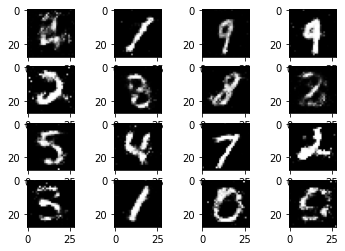

[24/200, 100/938] D_loss: 0.576 G_loss: 1.072
[24/200, 200/938] D_loss: 0.579 G_loss: 1.016
[24/200, 300/938] D_loss: 0.666 G_loss: 0.939
[24/200, 400/938] D_loss: 0.674 G_loss: 0.755
[24/200, 500/938] D_loss: 0.610 G_loss: 0.983
[24/200, 600/938] D_loss: 0.653 G_loss: 1.145
[24/200, 700/938] D_loss: 0.616 G_loss: 0.906
[24/200, 800/938] D_loss: 0.618 G_loss: 0.693
[24/200, 900/938] D_loss: 0.632 G_loss: 0.864
[24/200, 938/938] D_loss: 0.618 G_loss: 1.032


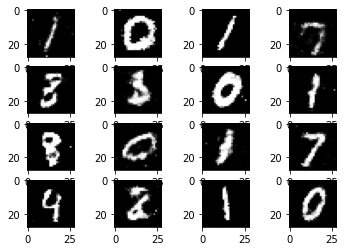

[25/200, 100/938] D_loss: 0.592 G_loss: 0.842
[25/200, 200/938] D_loss: 0.636 G_loss: 0.895
[25/200, 300/938] D_loss: 0.617 G_loss: 0.833
[25/200, 400/938] D_loss: 0.633 G_loss: 0.618
[25/200, 500/938] D_loss: 0.595 G_loss: 0.947
[25/200, 600/938] D_loss: 0.621 G_loss: 0.678
[25/200, 700/938] D_loss: 0.637 G_loss: 0.886
[25/200, 800/938] D_loss: 0.628 G_loss: 0.802
[25/200, 900/938] D_loss: 0.594 G_loss: 1.028
[25/200, 938/938] D_loss: 0.698 G_loss: 1.601


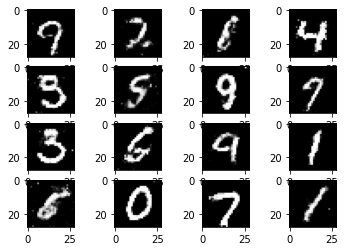

[26/200, 100/938] D_loss: 0.641 G_loss: 0.530
[26/200, 200/938] D_loss: 0.611 G_loss: 1.006
[26/200, 300/938] D_loss: 0.625 G_loss: 0.922
[26/200, 400/938] D_loss: 0.610 G_loss: 0.778
[26/200, 500/938] D_loss: 0.621 G_loss: 0.731
[26/200, 600/938] D_loss: 0.615 G_loss: 0.821
[26/200, 700/938] D_loss: 0.654 G_loss: 0.830
[26/200, 800/938] D_loss: 0.606 G_loss: 0.832
[26/200, 900/938] D_loss: 0.632 G_loss: 1.012
[26/200, 938/938] D_loss: 0.638 G_loss: 0.888


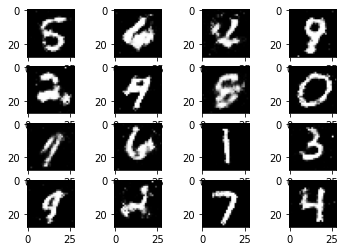

[27/200, 100/938] D_loss: 0.599 G_loss: 0.950
[27/200, 200/938] D_loss: 0.687 G_loss: 0.685
[27/200, 300/938] D_loss: 0.657 G_loss: 0.622
[27/200, 400/938] D_loss: 0.589 G_loss: 0.798
[27/200, 500/938] D_loss: 0.630 G_loss: 0.846
[27/200, 600/938] D_loss: 0.660 G_loss: 0.916
[27/200, 700/938] D_loss: 0.658 G_loss: 0.900
[27/200, 800/938] D_loss: 0.646 G_loss: 0.865
[27/200, 900/938] D_loss: 0.611 G_loss: 0.962
[27/200, 938/938] D_loss: 0.685 G_loss: 0.783


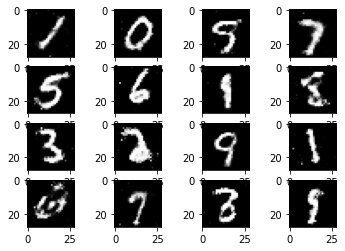

[28/200, 100/938] D_loss: 0.602 G_loss: 0.759
[28/200, 200/938] D_loss: 0.639 G_loss: 1.188
[28/200, 300/938] D_loss: 0.697 G_loss: 0.956
[28/200, 400/938] D_loss: 0.610 G_loss: 0.923
[28/200, 500/938] D_loss: 0.614 G_loss: 1.081
[28/200, 600/938] D_loss: 0.598 G_loss: 0.946
[28/200, 700/938] D_loss: 0.621 G_loss: 0.734
[28/200, 800/938] D_loss: 0.633 G_loss: 0.734
[28/200, 900/938] D_loss: 0.571 G_loss: 0.699
[28/200, 938/938] D_loss: 0.633 G_loss: 0.750


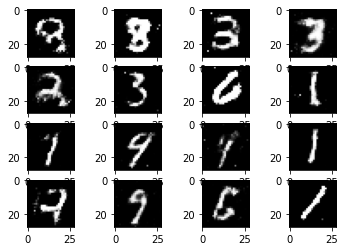

[29/200, 100/938] D_loss: 0.580 G_loss: 1.038
[29/200, 200/938] D_loss: 0.600 G_loss: 0.905
[29/200, 300/938] D_loss: 0.603 G_loss: 0.698
[29/200, 400/938] D_loss: 0.608 G_loss: 0.821
[29/200, 500/938] D_loss: 0.602 G_loss: 1.043
[29/200, 600/938] D_loss: 0.595 G_loss: 0.988
[29/200, 700/938] D_loss: 0.600 G_loss: 1.157
[29/200, 800/938] D_loss: 0.595 G_loss: 1.047
[29/200, 900/938] D_loss: 0.668 G_loss: 0.630
[29/200, 938/938] D_loss: 0.555 G_loss: 0.887


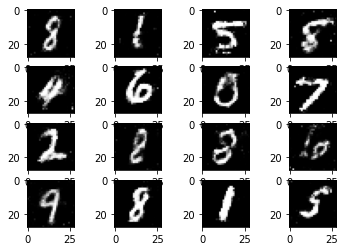

[30/200, 100/938] D_loss: 0.635 G_loss: 1.140
[30/200, 200/938] D_loss: 0.639 G_loss: 0.779
[30/200, 300/938] D_loss: 0.657 G_loss: 0.872
[30/200, 400/938] D_loss: 0.619 G_loss: 0.879
[30/200, 500/938] D_loss: 0.598 G_loss: 1.089
[30/200, 600/938] D_loss: 0.638 G_loss: 1.180
[30/200, 700/938] D_loss: 0.660 G_loss: 0.871
[30/200, 800/938] D_loss: 0.568 G_loss: 0.946
[30/200, 900/938] D_loss: 0.642 G_loss: 0.733
[30/200, 938/938] D_loss: 0.601 G_loss: 0.989


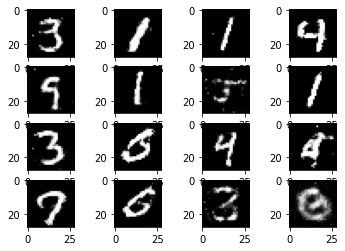

[31/200, 100/938] D_loss: 0.629 G_loss: 0.798
[31/200, 200/938] D_loss: 0.585 G_loss: 0.885
[31/200, 300/938] D_loss: 0.628 G_loss: 0.830
[31/200, 400/938] D_loss: 0.612 G_loss: 1.038
[31/200, 500/938] D_loss: 0.610 G_loss: 0.632
[31/200, 600/938] D_loss: 0.572 G_loss: 0.852
[31/200, 700/938] D_loss: 0.660 G_loss: 0.998
[31/200, 800/938] D_loss: 0.575 G_loss: 0.931
[31/200, 900/938] D_loss: 0.609 G_loss: 0.806
[31/200, 938/938] D_loss: 0.646 G_loss: 0.770


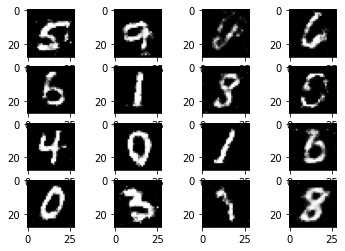

[32/200, 100/938] D_loss: 0.627 G_loss: 1.132
[32/200, 200/938] D_loss: 0.630 G_loss: 1.020
[32/200, 300/938] D_loss: 0.664 G_loss: 1.267
[32/200, 400/938] D_loss: 0.642 G_loss: 0.605
[32/200, 500/938] D_loss: 0.619 G_loss: 0.997
[32/200, 600/938] D_loss: 0.579 G_loss: 1.055
[32/200, 700/938] D_loss: 0.623 G_loss: 0.667
[32/200, 800/938] D_loss: 0.620 G_loss: 1.020
[32/200, 900/938] D_loss: 0.596 G_loss: 0.771
[32/200, 938/938] D_loss: 0.597 G_loss: 1.062


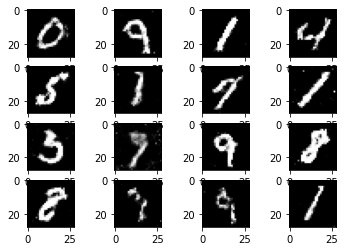

[33/200, 100/938] D_loss: 0.583 G_loss: 1.120
[33/200, 200/938] D_loss: 0.636 G_loss: 0.740
[33/200, 300/938] D_loss: 0.591 G_loss: 0.977
[33/200, 400/938] D_loss: 0.611 G_loss: 0.817
[33/200, 500/938] D_loss: 0.628 G_loss: 0.888
[33/200, 600/938] D_loss: 0.678 G_loss: 0.904
[33/200, 700/938] D_loss: 0.603 G_loss: 0.960
[33/200, 800/938] D_loss: 0.603 G_loss: 0.983
[33/200, 900/938] D_loss: 0.611 G_loss: 0.847
[33/200, 938/938] D_loss: 0.640 G_loss: 1.007


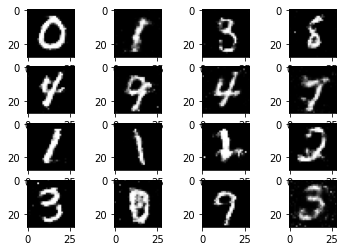

[34/200, 100/938] D_loss: 0.599 G_loss: 1.011
[34/200, 200/938] D_loss: 0.637 G_loss: 1.122
[34/200, 300/938] D_loss: 0.656 G_loss: 0.620
[34/200, 400/938] D_loss: 0.625 G_loss: 0.791
[34/200, 500/938] D_loss: 0.572 G_loss: 1.109
[34/200, 600/938] D_loss: 0.608 G_loss: 0.917


KeyboardInterrupt: 

In [7]:
# Train
for epoch in range(epochs):
    epoch += 1

    for times, data in enumerate(train_loader):
        times += 1
        real_inputs = data[0].to(device)
        test = 255 * (0.5 * real_inputs[0] + 0.5)

        real_inputs = real_inputs.view(-1, 784)
        real_outputs = D(real_inputs)
        real_label = torch.ones(real_inputs.shape[0], 1).to(device)

        noise = (torch.rand(real_inputs.shape[0], 128) - 0.5) / 0.5
        noise = noise.to(device)
        fake_inputs = G(noise)
        fake_outputs = D(fake_inputs)
        fake_label = torch.zeros(fake_inputs.shape[0], 1).to(device)

        outputs = torch.cat((real_outputs, fake_outputs), 0)
        targets = torch.cat((real_label, fake_label), 0)

        # Zero the parameter gradients
        d_optimizer.zero_grad()

        # Backward propagation
        d_loss = d_loss_function(outputs, targets)
        d_loss.backward()
        d_optimizer.step()

        # Generator
        noise = (torch.rand(real_inputs.shape[0], 128)-0.5)/0.5
        noise = noise.to(device)

        fake_inputs = G(noise)
        fake_outputs = D(fake_inputs)

        g_loss = g_loss_function(fake_outputs)
        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()

        if times % 100 == 0 or times == len(train_loader):
            print('[{}/{}, {}/{}] D_loss: {:.3f} G_loss: {:.3f}'.format(epoch, epochs, times, len(train_loader), d_loss.item(), g_loss.item()))

    imgs_numpy = (fake_inputs.data.cpu().numpy()+1.0)/2.0
    show_images(imgs_numpy[:16])
    plt.show()

    if epoch % 50 == 0:
        torch.save(G, 'Generator_epoch_{}.pth'.format(epoch))
        print('Model saved.')


print('Training Finished.')
print('Cost Time: {}s'.format(time.time()-start_time))